In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import pandas as pd


### Linear Curve fitting

Find the relation between the intrinsic brightness of a comet $m$ and its distance to the Sun. The apararent magnitude $m$ of a comet can generally be represented by a formula:

$$m = g + 5 log \Delta + \kappa log r$$

where :

$\Delta$ is the distance (AU) from the comet to the Earth

$r$ is the distance (AU) from the comet to the Sun

$log$ is in base 10

$g$ is the absolute magintude

$\kappa$ coefficient

The $g$ and $\kappa$  must be deduced from the observations. This can be performed when the magnitued $m$ has been measured during a sufficiently long period. More precisely, the range of $r$ should be sufficiently large. 

The unknowns are $g$ and $\kappa$ so the formula above can be written as:

$$m -5 log \Delta  = g + \kappa log r$$

$$ y =  a + b x $$

where :

$a$ = g 

$b$ = $\kappa$

$x$ = $log r$



The following table contains visual magnitudes estimates m of the periodic comet Wild 2 (1978). The corresponding values of $r$ an $\Delta$ have been calculated from orbital elements.


In [23]:
# Standard library imports
from pathlib import Path
import pathlib

In [24]:
fp = pathlib.Path.cwd().joinpath('../data/table4a.csv')
df = pd.read_csv(fp,sep='|',header=0)
df.head()

,month,ut,m,r,A,x,y
0,Febr,4.01,11.4,1.987,1.249,0.2982,10.92
1,Febr,5.00,11.5,1.981,1.252,0.2969,11.01
2,Febr,9.02,11.5,1.958,1.266,0.2918,10.99
3,Febr,10.02,11.3,1.952,1.270,0.2905,10.78
4,Febr,25.03,11.5,1.865,1.335,0.2707,10.77


Text(0, 0.5, 'y')

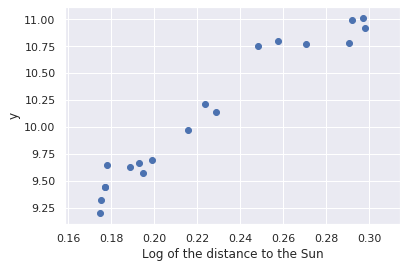

In [28]:
x = df['x'].to_numpy()
#x = df['m'].to_numpy()
y = df['y'].to_numpy()
plt.scatter(x, y);
plt.xlabel('Log of the distance to the Sun')
plt.ylabel('y')



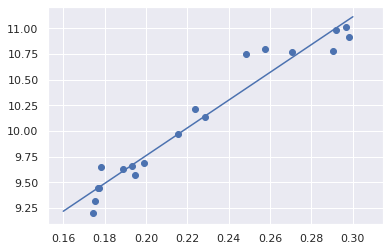

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
model = LinearRegression(fit_intercept=True)

# x[:,np.newaxis] --> add a new column to 0 because the api needs 2D vector
model.fit(x[:, np.newaxis], y)

xfit = np.linspace(0.16, 0.3, 50)
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit);

In [30]:
print("Slope:    ", model.coef_[0])
print("Intercept:", model.intercept_)
print("Correlation coeficient: ", model.score(x[:, np.newaxis], y))


Slope:     13.55184759736974
Intercept: 7.049016650497833
Correlation coeficient:  0.9485558436372301


Hence, the periodic comet Wild 2 in 1978, we have:

$$ m = 7.04 + 5 log_{10}\kappa + 13.55 log_{10} r $$

Next able gives for each the twenty-two sunspot maxima which have ocurred from 1761 to 1989, the time interval x, in months, since the previous minimum and the heigth y of the maximum (highest smoothed montly mean)

In [32]:
fp = pathlib.Path.cwd().joinpath('../data/table4b.csv')
df = pd.read_csv(fp,sep='|',header=0)
df.head(10)

,epoch,x,y
0,1761 June,73,90.4
1,1769 Oct,38,125.3
2,1778 May,35,161.8
3,1787 Nov,42,143.4
4,1804 Dic,78,52.5
5,1816 Mar,68,50.8
6,1829 June,74,71.5
7,1837 Feb,42,152.8
8,1847 Nov,52,131.3
9,1860 Jul,54,98.5


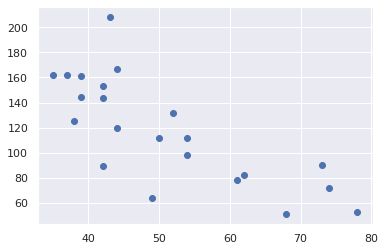

In [34]:
x = df['x'].to_numpy()
y = df['y'].to_numpy()
plt.scatter(x, y);

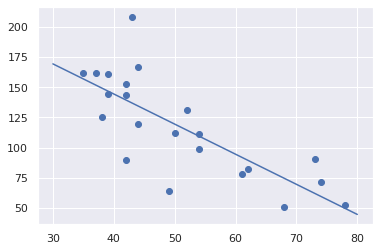

In [35]:
model = LinearRegression(fit_intercept=True)

model.fit(x[:, np.newaxis], y)

xfit = np.linspace(30, 80, 50)
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit);

In [36]:
print("Slope:    ", model.coef_[0])
print("Intercept:", model.intercept_)
#print("Correlation coeficient: ", model.score(x[:, np.newaxis], y))

Slope:     -2.493818375202594
Intercept: 244.1807536466775


This shows that there exists an evident trend to connection and the negative sign indicates that the correlation between x and y is negative: the longer the duration of the rise from a minimun to the next maximum of the sunsport activity, the lower this maximum generally is.

In [37]:
#https://realpython.com/numpy-scipy-pandas-correlation-python/#example-numpy-correlation-calculation
#https://jakevdp.github.io/PythonDataScienceHandbook/05.06-linear-regression.html
import scipy.stats
result = scipy.stats.linregress(x, y)
print("Slope:    ", result.slope)
print("Intercept:", result.intercept)
print("Correlation Coeficient:", result.rvalue)
print("P value:", result.pvalue)
print("Stderr:", result.stderr)


Slope:     -2.493818375202594
Intercept: 244.1807536466775
Correlation Coeficient: -0.7673007641544571
P value: 3.084421617092609e-05
Stderr: 0.46605471203795074


### General curve fitting
As linear regression 
https://www.astro.umass.edu/~schloerb/ph281/Lectures/LSQ_3/LSQ_3.pdf


In [38]:
fp = pathlib.Path.cwd().joinpath('../data/table4c.csv')
df = pd.read_csv(fp,sep='|',header=0)
df.head()

,degrees,y
0,3,0.0433
1,20,0.2532
2,34,0.3386
3,50,0.3560
4,75,0.4983


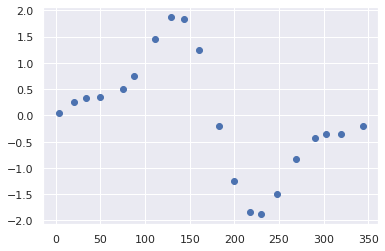

In [39]:
x = df['degrees'].to_numpy()
y = df['y'].to_numpy()
plt.scatter(x, y);

In [40]:
f_1 = lambda x : np.sin(np.deg2rad(x))
f_2 = lambda x : np.sin(2*np.deg2rad(x))
f_3 = lambda x : np.sin(3*np.deg2rad(x))

f = lambda x,a,b,c: a*f_1(x) + b*f_2(x) + c*f_3(x)

# The linear regression is done using as a base f_1 f_2 f_3
M = np.column_stack((f_1(x),f_2(x),f_3(x))) 
MTM = np.dot(M.transpose(),M)
MTMINV = np.linalg.inv(MTM)
MTY = np.dot(M.transpose(),y)
c1,c2,c3 = np.dot(MTMINV,MTY) # SOLUTION


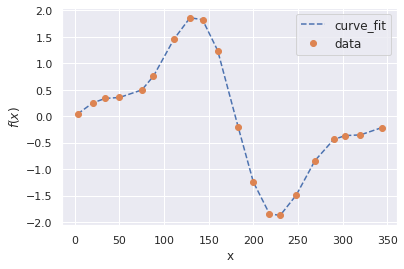

original coefficients:  1.200, -0.770,  0.390


In [41]:
plt.plot(x,f(x,c1,c2,c3), '--', label='curve_fit')
plt.plot(x,y, 'o', label='data')
plt.xlabel('x')
plt.ylabel('$f(x)$')
plt.legend(fontsize=12)
plt.show()
print('original coefficients: %6.3f, %6.3f, %6.3f' %(c1,c2,c3))
#print('fitted   coefficients: %6.3f, %6.3f, %6.3f' %(params[0], params[1], params[2]))

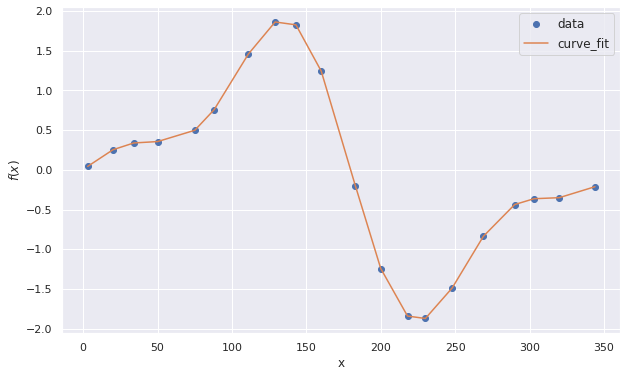

fitted   coefficients:  1.200, -0.770,  0.390


In [49]:
# The same but using scipy.optimize
from scipy.optimize import curve_fit

plt.figure(figsize=[10, 6])

#do the curve fit
params, extras = curve_fit(f, x, y)
plt.plot(x,y, 'o', label='data')
plt.plot(x,f(x,params[0],params[1],params[2]), label='curve_fit')

plt.xlabel('x')
plt.ylabel('$f(x)$')
#plt.xlim([x_min, x_max])
plt.legend(fontsize=12)
plt.show()
#print('original coefficients: %6.3f, %6.3f, %6.3f' %(a,b,c))
print('fitted   coefficients: %6.3f, %6.3f, %6.3f' %(params[0], params[1], params[2]))



### Iteration

In [73]:
# General function to iterate functions of onw variable
def do_iterations(f,x_0,n_iter=50):
    x = x_0
    for n in range(n_iter):
        new_value = f(x)
        if np.isclose(new_value,x):
            return (1,new_value,n)
        else :
            x = new_value
    return (0,new_value,n)
    
    do_iterations(f,0)

In [85]:
f = lambda x : np.power((8-3*x),0.2)
do_iterations(f,0)


(1, 1.3217860821189957, 8)

In [87]:
f = lambda x : 8/(np.power(x,4)+17)
do_iterations(f,0)

(1, 0.4692498764760976, 3)

In [91]:
f = lambda x : 8/(np.power(x,4)+3)
do_iterations(f,0,1000)

(0, 0.14943692676069634, 999)

In [80]:
do_iterations(f,0)

(1, 1.3217860821189957, 8)

In [107]:
# Using Newton-Ramson method
from scipy.optimize import newton

f = lambda x,W : x**3+3*x-W

x0 = 0
W = 1.5
xa = newton(f, x0, fprime=None, args=(W,), tol=1.48e-08, maxiter=50, fprime2=None)

print('xa: ', xa)
print('x0: ', x0)
print("f(xa) = ", f(xa,W))

xa:  0.46622052391077345
x0:  0
f(xa) =  0.0


In [106]:
# Witn W=0.9 it converges
# With W=1.5 

In [102]:
def f(x,W):
    return  x**3+3*x-W

In [ ]:
scipy.optimize.bisect(f, a, b, args=(), xtol=2e-12, rtol=8.881784197001252e-16, maxiter=100, full_output=False, disp=True)[source]¶

In orbital mechanics, when solving the central-force problem it becomes necessary to solve the Kepler's equation. This is a transcendental equation that relates the orbital parameters of the trajectory.

*Kepler equation:* $M = E - \epsilon \sin E$

where $M$ is the mean anomaly, $E$ the eccentric anomaly and $\epsilon$ the eccentricity. The mean anomaly can be computed with the expression

$$M = n\ t = \sqrt{ \frac{GM}{a^3} } t$$

where $n$ is the mean motion, $G$ the gravitational constant, $M$ the mass of the central body and $a$ the semi-major axis. $t$ is the time where the position in the trajectory will be computed.

The coordinates $x$ and $y$ as time functions can be recovered by means of the next expressions

$$x(t) = a(\cos E - \epsilon)$$

$$y(t) = b\sin E$$

where $b = a \sqrt{1-\epsilon^2}$ is the semi-minor axis of the orbit and the implicit time-dependence of the eccentric anomaly $E$ is computed through the Kepler's equation.